In [1]:
import numpy as np
import numpy.ma as ma
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import cartopy
import cartopy.crs as ccrs 
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from shapely.geometry import Point, LineString
import geopandas as gpd
from matplotlib.ticker import AutoMinorLocator

In [3]:
url_template = 'https://www.ndbc.noaa.gov/view_text_file.php?filename=46042h{year}.txt.gz&dir=data/historical/stdmet/'
    
# create an empty list to store the data frames
dfs = []

# loop through the years
for year in range(2000, 2023):

    # construct the file path
    url = url_template.format(year=year)
    
    # parse the data and create a data frame
    df = pd.read_csv(url, delim_whitespace=True, skiprows=1, header=None, names=['year', 'month', 'day', 'hour', 'minute', 'wdir', 'wspd', 'gst', 'wvht', 'dpd', 'apd', 'mwd', 'pres', 'atmp', 'wtmp', 'dewp', 'vis', 'ptdy', 'tide'])
    
    # add the data frame to the list
    dfs.append(df)

# concatenate all the data frames into a single data frame
df = pd.concat(dfs, ignore_index=True)

# print the resulting data frame
df.head()

/Users/dylan/opt/anaconda3/envs/geo2023spring/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,year,month,day,hour,minute,wdir,wspd,gst,wvht,dpd,apd,mwd,pres,atmp,wtmp,dewp,vis,ptdy,tide
0,2000,1,1,0,297,4.9,6.1,1.22,7.14,5.68,323,1017.4,11.0,11.6,6.5,99.0,NaN,NaN,NaN
1,2000,1,1,1,305,5.2,6.4,1.33,6.67,5.6,320,1017.6,11.1,11.7,6.7,99.0,NaN,NaN,NaN
2,2000,1,1,2,302,5.5,6.7,1.29,7.14,5.41,324,1018.1,11.2,11.6,6.7,99.0,NaN,NaN,NaN
3,2000,1,1,3,304,2.4,3.1,1.22,7.14,5.7,320,1018.1,11.3,11.6,6.6,99.0,NaN,NaN,NaN
4,2000,1,1,4,292,4.7,6.1,1.27,6.67,5.9,321,1018.5,11.5,11.6,7.2,99.0,NaN,NaN,NaN


In [9]:
####### sort out bad values
df_new = df[df['wvht'] != 99.0]
df_new_2 = df_new[df_new['wvht'] != 'm']
df_new_2
print(df_new_2.head())

   year month day hour minute wdir wspd   gst  wvht   dpd  apd     mwd  pres  \
0  2000     1   1    0    297  4.9  6.1  1.22  7.14  5.68  323  1017.4  11.0   
1  2000     1   1    1    305  5.2  6.4  1.33  6.67   5.6  320  1017.6  11.1   
2  2000     1   1    2    302  5.5  6.7  1.29  7.14  5.41  324  1018.1  11.2   
3  2000     1   1    3    304  2.4  3.1  1.22  7.14   5.7  320  1018.1  11.3   
4  2000     1   1    4    292  4.7  6.1  1.27  6.67   5.9  321  1018.5  11.5   

   atmp wtmp  dewp  vis ptdy  tide  
0  11.6  6.5  99.0  NaN  NaN   NaN  
1  11.7  6.7  99.0  NaN  NaN   NaN  
2  11.6  6.7  99.0  NaN  NaN   NaN  
3  11.6  6.6  99.0  NaN  NaN   NaN  
4  11.6  7.2  99.0  NaN  NaN   NaN  


In [ ]:
# df_new_2.to_csv('data2.txt', sep='\t') # now i want to have a datetime as index

In [10]:
df_new_2.columns

Index(['year', 'month', 'day', 'hour', 'minute', 'wdir', 'wspd', 'gst', 'wvht',
       'dpd', 'apd', 'mwd', 'pres', 'atmp', 'wtmp', 'dewp', 'vis', 'ptdy',
       'tide'],
      dtype='object')

In [11]:
date_cols = ['year','month','day','hour','minute']
df_new_2['datetime'] = pd.to_datetime(df_new_2[date_cols])
df_new_2.set_index('datetime',inplace=True)
df_new_2.drop(date_cols,axis=1,inplace=True)
# df_new_2.set_index('datetime',inplace=True)
# df_new_2.drop(date_cols,axis=1,inplace=True)

print(df_new_2)

                    wdir  wspd   gst  wvht    dpd   apd     mwd    pres  atmp  \
datetime                                                                        
2000-01-01 04:57:00  4.9   6.1  1.22  7.14   5.68   323  1017.4    11.0  11.6   
2000-01-01 06:05:00  5.2   6.4  1.33  6.67    5.6   320  1017.6    11.1  11.7   
2000-01-01 07:02:00  5.5   6.7  1.29  7.14   5.41   324  1018.1    11.2  11.6   
2000-01-01 08:04:00  2.4   3.1  1.22  7.14    5.7   320  1018.1    11.3  11.6   
2000-01-01 08:52:00  4.7   6.1  1.27  6.67    5.9   321  1018.5    11.5  11.6   
...                  ...   ...   ...   ...    ...   ...     ...     ...   ...   
2022-12-31 19:40:00  172  10.9  15.1  2.99  13.79  6.54     281  1005.3  13.7   
2022-12-31 20:40:00  175  12.8  16.2  3.17  12.12  6.51     282  1003.3  13.7   
2022-12-31 21:40:00  181  12.4  15.2  3.38  14.81  6.57     303  1001.9  13.7   
2022-12-31 22:40:00  242  10.8  17.3  3.32  10.81  6.34     272  1002.0  12.6   
2022-12-31 23:40:00  307  13

/var/folders/4l/gn64yzcd6938cphmlv0bpkj80000gn/T/ipykernel_4095/2137210434.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_2['datetime'] = pd.to_datetime(df_new_2[date_cols])
/Users/dylan/opt/anaconda3/envs/geo2023spring/lib/python3.8/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [12]:
cols_to_drop = ['pres','atmp','dewp','vis','ptdy','tide','wdir','wspd','gst']
df_new_2.drop(cols_to_drop,axis=1,inplace=True)
print(df_new_2)

                     wvht    dpd   apd     mwd   wtmp
datetime                                             
2000-01-01 04:57:00  7.14   5.68   323  1017.4    6.5
2000-01-01 06:05:00  6.67    5.6   320  1017.6    6.7
2000-01-01 07:02:00  7.14   5.41   324  1018.1    6.7
2000-01-01 08:04:00  7.14    5.7   320  1018.1    6.6
2000-01-01 08:52:00  6.67    5.9   321  1018.5    7.2
...                   ...    ...   ...     ...    ...
2022-12-31 19:40:00  2.99  13.79  6.54     281   12.5
2022-12-31 20:40:00  3.17  12.12  6.51     282  999.0
2022-12-31 21:40:00  3.38  14.81  6.57     303  999.0
2022-12-31 22:40:00  3.32  10.81  6.34     272  999.0
2022-12-31 23:40:00  3.86   12.9  7.17     272  999.0

[286897 rows x 5 columns]


/Users/dylan/opt/anaconda3/envs/geo2023spring/lib/python3.8/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [13]:
print(df_new_2)

                     wvht    dpd   apd     mwd   wtmp
datetime                                             
2000-01-01 04:57:00  7.14   5.68   323  1017.4    6.5
2000-01-01 06:05:00  6.67    5.6   320  1017.6    6.7
2000-01-01 07:02:00  7.14   5.41   324  1018.1    6.7
2000-01-01 08:04:00  7.14    5.7   320  1018.1    6.6
2000-01-01 08:52:00  6.67    5.9   321  1018.5    7.2
...                   ...    ...   ...     ...    ...
2022-12-31 19:40:00  2.99  13.79  6.54     281   12.5
2022-12-31 20:40:00  3.17  12.12  6.51     282  999.0
2022-12-31 21:40:00  3.38  14.81  6.57     303  999.0
2022-12-31 22:40:00  3.32  10.81  6.34     272  999.0
2022-12-31 23:40:00  3.86   12.9  7.17     272  999.0

[286897 rows x 5 columns]


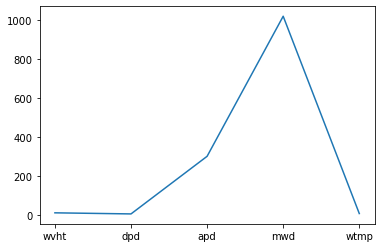

In [14]:
plt.plot(df_new_2.iloc[2008])

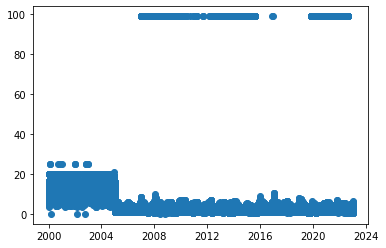

In [18]:
plt.scatter(df_new_2.index,df_new_2.wvht)

In [ ]:
df_new_2